# Tip amounts of taxi trips

In [1]:
import setup

def districts_tips(month):
    return month.loc[(month['payment_type'] == 1) & (month['passenger_count'] > 0)][['PULocationID', 'tip_amount']]
    

def devide_by_districts(month):
    districts = [0,0,0,0,0]
    district_counts = [0,0,0,0,0]
    for i in range(5):
        districts[i] = month.loc[(month.PULocationID.isin(setup.districts[i]))]['tip_amount'].mean()
    return districts

def sum_up_districts(average, month):
    for i in range(5):
        average[i] += month[i]
    return average

def get_trip_tips(month):
    return month.loc[(month['payment_type'] == 1) & (month['passenger_count'] > 0)][['tip_amount','trip_distance']].astype(float)

def tip_amounts(month):
    average = month['tip_amount'].mean()
    lower = month.loc[month['trip_distance'] <= month['trip_distance'].mean()]['tip_amount'].mean()
    upper = month.loc[month['trip_distance'] >= month['trip_distance'].mean()]['tip_amount'].mean()
    return [average,lower,upper]

def tip_amount_average(tip_amounts_year):
    tmp = [0,0,0]
    for monthly_index in range(12):
        for tip_index in range(3):
            tmp[tip_index] += tip_amounts_year[monthly_index][tip_index]
    for i in range(3):
        tmp[i] /= 12
    return tmp

def result(tip_amounts_year):
    for monthly_index in range(12):
        print('----------', setup.month_labels[monthly_index], '----------')
        for tip_index in range(3):
            print(setup.tip_labels[tip_index], '=', tip_amounts_year[monthly_index][tip_index])
        print('')

# NYC districts
#### Tip amount for each district in NYC

-------------------- YEAR AVERAGE --------------------
[1.6038570202836313, 2.6238329569011998, 2.358494313717896, 7.5715961566009184, 3.240462558300724] 


-------------------- JANUARY --------------------
[2.5121423682409305, 2.7527315212207917, 2.2735572109207083, 7.578271506997987, 4.432170542635659] 

-------------------- FEBRUARY --------------------
[2.2611340593315807, 2.738966824332119, 2.2794012934220076, 7.498244968679196, 4.656944444444445] 

-------------------- MARCH --------------------
[1.7615554115359688, 2.6858021272021344, 2.3280739252779608, 7.608668013397801, 3.162517985611511] 

-------------------- APRIL --------------------
[1.53953119232189, 2.697438753362879, 2.349080499224844, 7.622319213867188, 5.814782608695652] 

-------------------- MAY --------------------
[1.5511848494658467, 2.6833074695714307, 2.4088860588235423, 7.663729112974458, 3.2181920903954797] 

-------------------- JUNE --------------------
[1.4727145085803433, 2.688559992962702, 2.3888012055

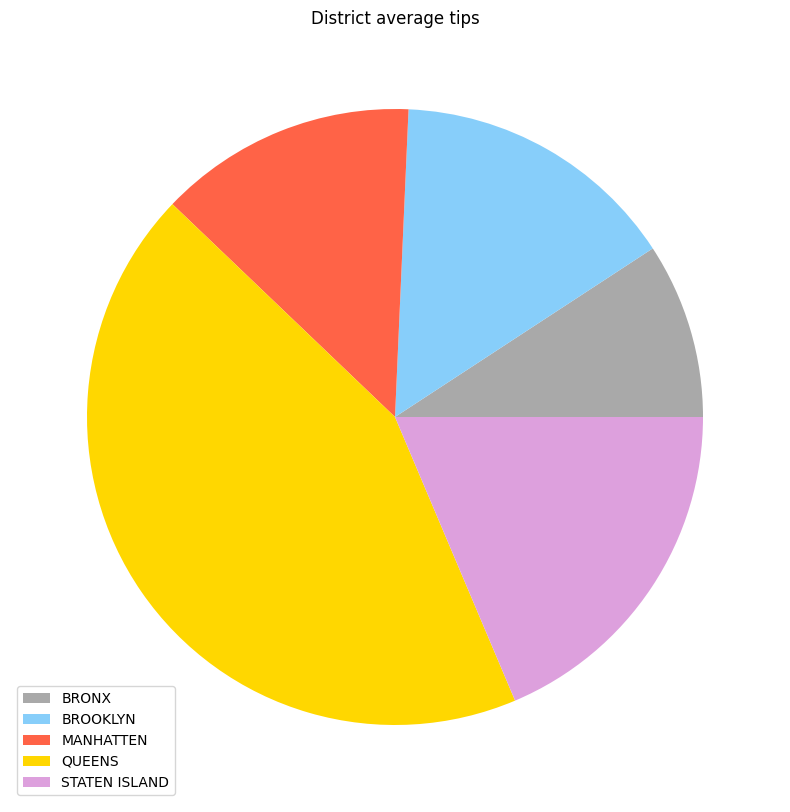

In [2]:
both_year_from_manhatten = []
for month in setup.year:
    both_year_from_manhatten.append(districts_tips(month))
tips_year_from_manhatten = []
for month in both_year_from_manhatten:
    tips_year_from_manhatten.append(devide_by_districts(month))
average_tips = [0,0,0,0,0]
for month in tips_year_from_manhatten:
    average_tips = sum_up_districts(average_tips, month)
for i in range(5):
    average_tips[i] /= 12

print('-------------------- YEAR AVERAGE --------------------')
print(average_tips, '\n\n')
for index in range(12):
    print('--------------------', setup.month_labels[index], '--------------------')
    print(tips_year_from_manhatten[index], '\n')
fig = setup.plt.figure(figsize =(10, 10))
setup.plt.title('District average tips')
setup.plt.pie(average_tips, colors=setup.district_colors)
setup.plt.legend(setup.district_labels,loc=3)
setup.plt.show()

# Tip amounts
#### Tip amounts based on trip distance

In [3]:
splitted_trips = []
for month in setup.year:
    splitted_trips.append(get_trip_tips(month))
tip_amounts_year = []
for month in splitted_trips:
    tip_amounts_year.append(tip_amounts(month))
tip_amounts_average = tip_amount_average(tip_amounts_year)
print('---------- YEAR AVERAGE ----------')
for index in range(3):
    print(setup.tip_labels[index], '=', tip_amounts_average[index])
print('\n')
result(tip_amounts_year)

---------- YEAR AVERAGE ----------
AVERAGE = 2.7005572059002176
LOWER = 1.848472595761123
UPPER = 5.14653577358896


---------- JANUARY ----------
AVERAGE = 2.6098443962005753
LOWER = 1.7878413510214877
UPPER = 5.011832653890032

---------- FEBRUARY ----------
AVERAGE = 2.5920163077998515
LOWER = 1.7751505331839028
UPPER = 4.937995083920137

---------- MARCH ----------
AVERAGE = 2.6563963239125994
LOWER = 1.8030523382488601
UPPER = 5.115965451279914

---------- APRIL ----------
AVERAGE = 2.703023595872299
LOWER = 1.832383325151088
UPPER = 5.180304325246146

---------- MAY ----------
AVERAGE = 2.7682385090777806
LOWER = 1.8750025815490254
UPPER = 5.307220855490546

---------- JUNE ----------
AVERAGE = 2.7449218511420628
LOWER = 1.8617161519225758
UPPER = 5.242039050449568

---------- JULY ----------
AVERAGE = 2.690461097324169
LOWER = 1.844806557301549
UPPER = 5.107856187312985

---------- AUGUST ----------
AVERAGE = 2.6783233227660825
LOWER = 1.837241936080326
UPPER = 5.086901538677267